In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline  

## 1. Let's import some data

In [3]:
dataset=pd.DataFrame()
dataset=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AOMDeepLearningWorkshop/master/hourly_wages.csv')

In [4]:
dataset.head(10)

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
5,13.07,1,13,9,28,0,0,0,0,0
6,4.45,0,10,27,43,0,0,1,0,0
7,19.47,0,12,9,27,0,0,0,0,0
8,13.28,0,16,11,33,0,1,0,1,0
9,8.75,0,12,9,27,0,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [27]:
firstcolumn=dataset.iloc[:,0]
## we need to extract just the values
target=firstcolumn.values

In [28]:
target[0:10]

array([  5.1 ,   4.95,   6.67,   4.  ,   7.5 ,  13.07,   4.45,  19.47,
        13.28,   8.75])

In [29]:
restofcolumns=dataset.iloc[:,1:]
## we need to extract just the values
predictors=restofcolumns.values

In [30]:
predictors[0:10]

array([[ 0,  8, 21, 35,  1,  1,  0,  1,  0],
       [ 0,  9, 42, 57,  1,  1,  0,  1,  0],
       [ 0, 12,  1, 19,  0,  0,  0,  1,  0],
       [ 0, 12,  4, 22,  0,  0,  0,  0,  0],
       [ 0, 12, 17, 35,  0,  1,  0,  0,  0],
       [ 1, 13,  9, 28,  0,  0,  0,  0,  0],
       [ 0, 10, 27, 43,  0,  0,  1,  0,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0],
       [ 0, 16, 11, 33,  0,  1,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0]])

In [31]:
numberofcolumns=predictors.shape[1]

In [32]:
numberofcolumns

9

## 2. Let's understand the data

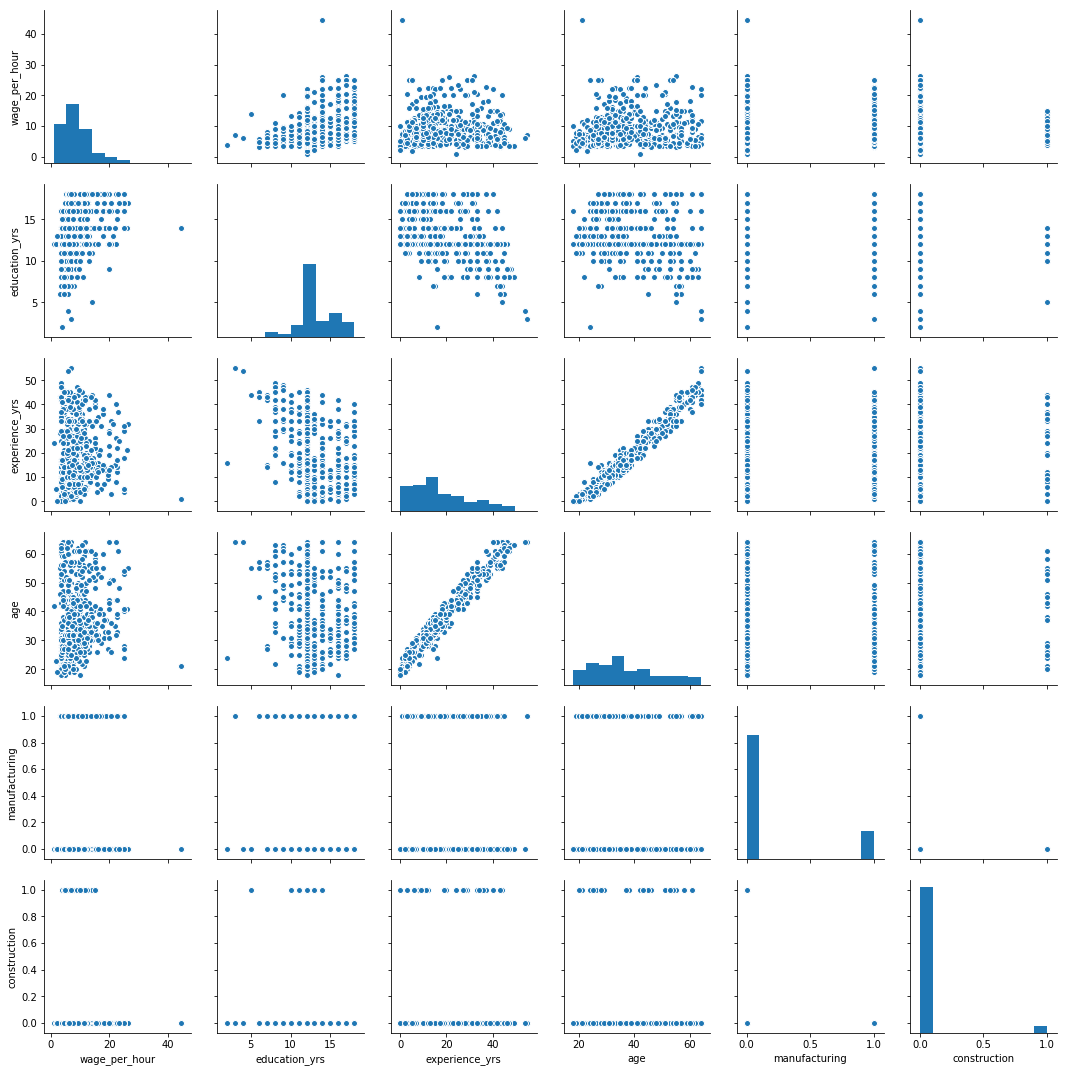

In [26]:
g = sns.pairplot(dataset[['wage_per_hour','education_yrs','experience_yrs','age','manufacturing','construction']])

# 3. Let's specify the architecture of the model 

In [35]:
# Specify the model
model=Sequential()
model.add(Dense(10, activation='relu', input_shape = (numberofcolumns,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

# 4. Let's compile our model

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])

# 5. Let's fit our model

In [17]:
# fit model
history = model.fit(predictors,target,verbose=2,epochs=10)

Epoch 1/10
 - 0s - loss: 195.5772 - mean_squared_error: 195.5772 - mean_absolute_error: 10.6348
Epoch 2/10
 - 0s - loss: 111.4515 - mean_squared_error: 111.4515 - mean_absolute_error: 7.7783
Epoch 3/10
 - 0s - loss: 68.9013 - mean_squared_error: 68.9013 - mean_absolute_error: 6.0712
Epoch 4/10
 - 0s - loss: 48.2129 - mean_squared_error: 48.2129 - mean_absolute_error: 5.0308
Epoch 5/10
 - 0s - loss: 38.2373 - mean_squared_error: 38.2373 - mean_absolute_error: 4.4439
Epoch 6/10
 - 0s - loss: 33.1533 - mean_squared_error: 33.1533 - mean_absolute_error: 4.1025
Epoch 7/10
 - 0s - loss: 29.9454 - mean_squared_error: 29.9454 - mean_absolute_error: 3.8817
Epoch 8/10
 - 0s - loss: 27.7375 - mean_squared_error: 27.7375 - mean_absolute_error: 3.7444
Epoch 9/10
 - 0s - loss: 26.0194 - mean_squared_error: 26.0194 - mean_absolute_error: 3.6496
Epoch 10/10
 - 0s - loss: 24.7190 - mean_squared_error: 24.7190 - mean_absolute_error: 3.5691


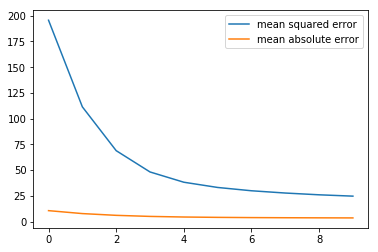

In [18]:

# plot metrics
pyplot.plot(history.history['mean_squared_error'],label='mean squared error')
pyplot.plot(history.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

### You can try to improve the model by: (1) add more layers (deeper network), running more epochs, adding more neurons (wider network)...
### In this case we need more data, that is usually the case with deep learning. It needs lots of data (thousands)

## 5.1 Let's fit a wider model

Epoch 1/10
 - 0s - loss: 48.1293 - mean_squared_error: 48.1293 - mean_absolute_error: 5.2731
Epoch 2/10
 - 0s - loss: 27.6501 - mean_squared_error: 27.6501 - mean_absolute_error: 3.6861
Epoch 3/10
 - 0s - loss: 22.5393 - mean_squared_error: 22.5393 - mean_absolute_error: 3.4025
Epoch 4/10
 - 0s - loss: 21.6995 - mean_squared_error: 21.6995 - mean_absolute_error: 3.4137
Epoch 5/10
 - 0s - loss: 21.2323 - mean_squared_error: 21.2323 - mean_absolute_error: 3.3648
Epoch 6/10
 - 0s - loss: 20.9194 - mean_squared_error: 20.9194 - mean_absolute_error: 3.3391
Epoch 7/10
 - 0s - loss: 20.7454 - mean_squared_error: 20.7454 - mean_absolute_error: 3.2694
Epoch 8/10
 - 0s - loss: 20.5418 - mean_squared_error: 20.5418 - mean_absolute_error: 3.3572
Epoch 9/10
 - 0s - loss: 21.0042 - mean_squared_error: 21.0042 - mean_absolute_error: 3.2969
Epoch 10/10
 - 0s - loss: 20.2576 - mean_squared_error: 20.2576 - mean_absolute_error: 3.2065


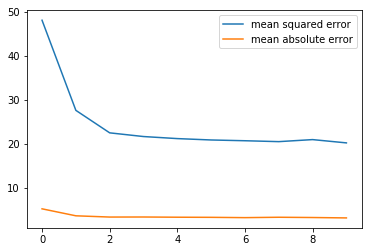

In [37]:
# Specify the model
widermodel=Sequential()
widermodel.add(Dense(100, activation='relu', input_shape = (numberofcolumns,)))
widermodel.add(Dense(50, activation='relu'))
widermodel.add(Dense(1))


# Compile the model
widermodel.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])


# train model
widerhistory = widermodel.fit(predictors,target,verbose=2,epochs=10)


# plot metrics
pyplot.plot(widerhistory.history['mean_squared_error'],label='mean squared error')
pyplot.plot(widerhistory.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

## 5.2 Let's fit a deeper model

Epoch 1/10
 - 0s - loss: 20.2616 - mean_squared_error: 20.2616 - mean_absolute_error: 3.2614
Epoch 2/10
 - 0s - loss: 20.0631 - mean_squared_error: 20.0631 - mean_absolute_error: 3.2339
Epoch 3/10
 - 0s - loss: 20.1602 - mean_squared_error: 20.1602 - mean_absolute_error: 3.2126
Epoch 4/10
 - 0s - loss: 20.0738 - mean_squared_error: 20.0738 - mean_absolute_error: 3.2307
Epoch 5/10
 - 0s - loss: 20.4380 - mean_squared_error: 20.4380 - mean_absolute_error: 3.2445
Epoch 6/10
 - 0s - loss: 19.7181 - mean_squared_error: 19.7181 - mean_absolute_error: 3.1738
Epoch 7/10
 - 0s - loss: 19.6772 - mean_squared_error: 19.6772 - mean_absolute_error: 3.1605
Epoch 8/10
 - 0s - loss: 19.7890 - mean_squared_error: 19.7890 - mean_absolute_error: 3.1824
Epoch 9/10
 - 0s - loss: 20.0795 - mean_squared_error: 20.0795 - mean_absolute_error: 3.2292
Epoch 10/10
 - 0s - loss: 19.3985 - mean_squared_error: 19.3985 - mean_absolute_error: 3.1550


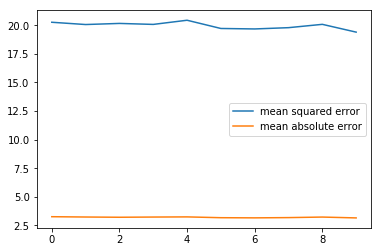

In [38]:
# Specify the model
deepermodel=Sequential()
deepermodel.add(Dense(100, activation='relu', input_shape = (numberofcolumns,)))
deepermodel.add(Dense(50, activation='relu'))
deepermodel.add(Dense(10, activation='relu'))
deepermodel.add(Dense(1))


# Compile the model
deepermodel.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae'])


# train model
deeperhistory = widermodel.fit(predictors,target,verbose=2,epochs=10)


# plot metrics
pyplot.plot(deeperhistory.history['mean_squared_error'],label='mean squared error')
pyplot.plot(deeperhistory.history['mean_absolute_error'],label='mean absolute error')
pyplot.legend()
pyplot.show()

# 6. Let's predict using our first model

In [89]:
model.predict(np.array([[0,8,21,35,1,1,0,1,0]]))

array([[ 7.06479549]], dtype=float32)

In [90]:
model.predict(np.array([[0,12,4,22,0,0,0,0,0]]))


array([[ 7.32750416]], dtype=float32)